# Next tasks

1. Fit SNIa dndz points to two-parameter smail nz distribution.
    1. Check visually if the fit is good
    1. Plot the absolute and relative difference per bin
1. (If the Smail fit is bad, try to propose a better fit)
    1. Suggestion 1: plot in loglog scale and try to identify regions of power law and/or exponential behaviour
1. dsfsdfs

### Tests

In [251]:
import jax
import jax_cosmo as jc
import jax.numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

## Defining redshift distributions
For the purpose of this tutorial, let's see how to define a Smail type distribution:
$$ n(z) = z^a \exp(- (z/z_0)^b) $$
which depends on 3 parameters.

In [305]:
def smail_distribution(a, b, z0, z):
    return z**a * np.exp(-((z/z0) ** b))

In [205]:
#open file

# FIXME: add file to local repository (?) 
# Path on my mac
data = pd.read_csv('/Users/joaopedrobonifacio/Documents/lib/python/Peculiar_Velocities_Cells/z_distribution.csv', sep=',', header=0)

#Path on OV
#arquivo = open('/home/joao/lib/python/Peculiar_Velocities_Cells/z_distribution.csv', 'r')
#data = pd.read_csv(arquivo, sep=',', header=0)

z =[]
spec_SNe =[]

for i in data:
    z.append(data['z'])
    spec_SNe.append(data['spec_SNe'])

z = np.array(z[0])
spec_SNe = np.array(spec_SNe[0])

In [306]:
# Fit
a_guess =1
b_guess = 2
z0_guess = .3

guess =[a_guess, b_guess, z0_guess]
fit, cov = curve_fit(smail_distribution, z, spec_SNe ,p0=guess, absolute_sigma=True)

a_fit, b_fit, z0_fit = fit 

print('a = {}'.format(a_fit))
print('b= {}'.format(b_fit))
print('z0= {}'.format(z0_fit))

a = 1.0
b= 2.0
z0= 0.3


/var/folders/nc/q08wj91x3_94kqtckryqhfxh0000gn/T/ipykernel_48517/3779799574.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return z**a * np.exp(-((z/z0) ** b))


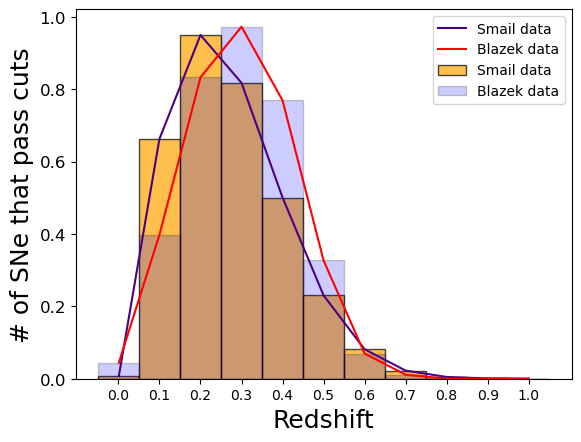

In [314]:
# Using smail_nz with the parameters from the fit  
nz = jc.redshift.smail_nz(a_fit, b_fit, z0_fit)

#Plot 
plt.bar(z, nz(z)/3, color='orange', alpha=0.7, width=0.1, edgecolor='k', label='Smail data')
plt.plot(z, nz(z)/3, color = 'indigo', linewidth=1.5, label='Smail data')
plt.bar(z, spec_SNe/100000, color='blue', alpha=.2, width=0.1, edgecolor='k', label='Blazek data')
plt.plot(z, spec_SNe/100000, color='red', label ='Blazek data')
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.])
#plt.xlim(0, 0.8)
plt.yticks(fontsize=12)
#plt.yscale('log')
plt.xlabel('Redshift', fontsize=18)
plt.ylabel('# of SNe that pass cuts', fontsize=18)
plt.legend()
#plt.savefig('log_curve_data.png')  

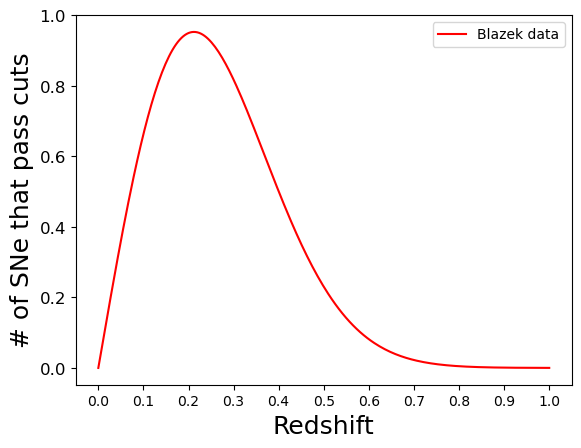

In [293]:
z1 = np.linspace(0., 1.0, 256)
nz1 = jc.redshift.smail_nz(1., 2., 0.3)

#FIXME: legend label 
#Plot 
#plt.bar(z, nz(z)/3, color='orange', alpha=0.7, width=0.1, edgecolor='k', label='Smail data')
#plt.plot(z, nz(z)/3, color = 'indigo', linewidth=1.5, label='Smail data')
#plt.bar(z, spec_SNe/100000, color='blue', alpha=.2, width=0.1, edgecolor='k', label='Blazek data')
plt.plot(z1, nz1(z1)/3, color='red', label ='Blazek data')
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.])
#plt.xlim(0, 0.8)
plt.yticks(fontsize=12)
#plt.yscale('log')
plt.xlabel('Redshift', fontsize=18)
plt.ylabel('# of SNe that pass cuts', fontsize=18)
plt.legend()
#plt.savefig('log_curve_data.png')  